## learning-AI101 : MNIST classification (ANN)
- 혼자 공부하는 머신러닝과 딥러닝 : 340p~366p
- 2024.07.30.
----

### ANN
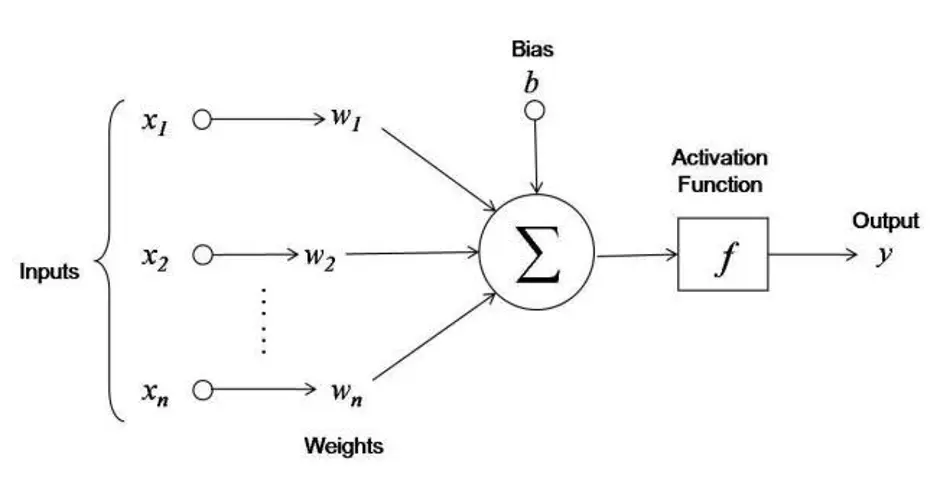
- 인공 신경망, 머신러닝의 일종
- 특징
    - input layer와 output layer가 fully connected (따라서 hidden layer가 존재하지 않는다.)
    - dense를 한 layer만 modelling (output layer)
    - input layer가 1 by n 모양으로 구성되었기 때문에, input data는 1차원 형태여야 함 (np.reshape)
- 알아두어야 할 점
    - activation function은 weighted sum (linear combination된 값들)을 조정하는 (선형 방정식 계산 결과에 적용되는 함수) 함수
        - 그러한 activation function은 매 dense layer마다 존재
        - 현재 ANN은 dense layer가 output layer만 있으니 (fully connected) dense를 하나만 구성
    - 순서
        - machine learning
            - modelling
            - fit
            - score, predict
        - deep learning
            - modelling (dense layer 구성) : 각 레이어의 activation function, 뉴런의 갯수를 지정해준다
                - 이진 분류 : binary_crossentropy
                - 다중 분류 : categorical_crossentropy (target이 one-hot encoding 되어있다면)
                    - 만약 one-hot encoding이 되어있지 않다면 (target이 정수) : sparse_categorical_crossentropy
            - compile : loss function의 유형과 metrics를 지정해준다.
            - fit : train set과 epoch
            - evaluate : validation set 혹은 test set을 이용하여 평가
                - 참고로 deep learning에서는 cross-validation을 하지 않음
                    - deep learning은 보통 굉장히 많은 records와 feature가 있을 때 도입하기 좋은데, 그러면 train set도 충분하니 validation을 cross로 하지 않아도 됨.
                    - deep learning하는데 시간이 몇시간씩 소요되어서 validation까지 하기엔 시간낭비

In [23]:
# MNIST 데이터셋 가져오기

from keras.datasets.fashion_mnist import load_data

(X_train, y_train), (X_test, y_test) = load_data()
print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [24]:
# train set, test set을 scaling, 그리고 reshape 

X_train_scaled = X_train / 255.0 # 0~1 사이의 값으로 정규화하는 것 (numpy니깐 이게 가능함)
X_train_scaled = X_train.reshape(-1, 28*28)

X_test_scaled = X_test / 255.0 # 0~1 사이의 값으로 정규화하는 것 (numpy니깐 이게 가능함)
X_test_scaled = X_test.reshape(-1, 28*28)

In [25]:
# 먼저 SGDClassifier을 도입하여 학습을 진행

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_validate
import numpy as np

sc = SGDClassifier(loss='log_loss', max_iter=20) # SGDClassifier 학습 (로지스틱 회귀)
scores = cross_validate(sc, X_train_scaled, y_train, n_jobs=-1)

print (scores)
print ('score : ', np.mean(scores['test_score']))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reache

{'fit_time': array([16.05957627, 16.07698798, 16.07350779, 16.05995798, 16.08418512]), 'score_time': array([0.06583071, 0.06236315, 0.06234598, 0.06392002, 0.06409192]), 'test_score': array([0.8145    , 0.78408333, 0.81425   , 0.81666667, 0.80383333])}
score :  0.8066666666666666


In [26]:
# 딥러닝을 도입하여 학습을 진행
# 먼저 X_train_scaled를 다시 X_train_scaled와 X_val_scaled로 나눔, 추후 val은 evaluate에 사용할 예정

from sklearn.model_selection import train_test_split

X_train_scaled, X_val_scaled, y_train, y_val = train_test_split(X_train_scaled, y_train,
                                                               test_size=0.2)

print (X_train_scaled.shape, X_val_scaled.shape)

(48000, 784) (12000, 784)


In [27]:
# modelling

from tensorflow import keras

dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))
model = keras.Sequential(dense)

# 10 : 출력의 갯수 (1개면 regression)
# softmax : 10개 다중분류이기 때문에 softmax, 이중 분류였다면 sigmoid
# 현재 28 * 28, 즉 784개의 feature가 input layer의 node로 들어옴

In [29]:
# compile

model.compile (loss='sparse_categorical_crossentropy', metrics='accuracy')

# 현재 target을 one-hot encoding을 하지 않은 상태이기 때문에 sparse을 loss로 씀
# metrics에 accuracy를 추가하면 epoch마다 모델의 accuracy를 알 수 있게 됨 (loss는 점점 줄어들 거임)

In [30]:
# fit

model.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
1500/1500 [==============================] - 1s 820us/step - loss: 21.9413 - accuracy: 0.7288
Epoch 2/50
1500/1500 [==============================] - 1s 773us/step - loss: 17.1872 - accuracy: 0.7765
Epoch 3/50
1500/1500 [==============================] - 1s 778us/step - loss: 16.2118 - accuracy: 0.7870
Epoch 4/50
1500/1500 [==============================] - 1s 782us/step - loss: 15.7195 - accuracy: 0.7918
Epoch 5/50
1500/1500 [==============================] - 1s 775us/step - loss: 15.4459 - accuracy: 0.7939
Epoch 6/50
1500/1500 [==============================] - 1s 772us/step - loss: 15.1859 - accuracy: 0.7972
Epoch 7/50
1500/1500 [==============================] - 1s 763us/step - loss: 15.1277 - accuracy: 0.7973
Epoch 8/50
1500/1500 [==============================] - 1s 919us/step - loss: 14.9108 - accuracy: 0.7998
Epoch 9/50
1500/1500 [==============================] - 1s 758us/step - loss: 14.8483 - accuracy: 0.7997
Epoch 10/50
1500/1500 [==============================] 

In [32]:
# evaluate

model.evaluate(X_val_scaled, y_val) # validation

# 첫번째 원소는 loss, 두번째 원소는 accuracy

375/375 [==============================] - 0s 728us/step - loss: 15.4703 - accuracy: 0.8309


[15.470271110534668, 0.8309166431427002]

In [36]:
# predict

predict = model.predict(X_test_scaled)

cnt = 0

for i in range (len(predict)) : 
    for j in range (10) :
        if predict[i][j] != 0 : 
            print (f"prediction : {j} | real : {y_test[i]}")
            
            if j == y_test[i] :
                cnt += 1
                
print ("cnt : ", cnt)
print ("test accuracy : ", cnt/len(predict))

313/313 [==============================] - 0s 656us/step
prediction : 9 | real : 9
prediction : 2 | real : 2
prediction : 1 | real : 1
prediction : 1 | real : 1
prediction : 0 | real : 6
prediction : 2 | real : 6
prediction : 4 | real : 6
prediction : 6 | real : 6
prediction : 1 | real : 1
prediction : 4 | real : 4
prediction : 2 | real : 6
prediction : 4 | real : 6
prediction : 6 | real : 6
prediction : 5 | real : 5
prediction : 7 | real : 5
prediction : 7 | real : 7
prediction : 2 | real : 4
prediction : 4 | real : 4
prediction : 5 | real : 5
prediction : 5 | real : 7
prediction : 3 | real : 3
prediction : 2 | real : 4
prediction : 4 | real : 4
prediction : 1 | real : 1
prediction : 2 | real : 2
prediction : 2 | real : 4
prediction : 8 | real : 8
prediction : 0 | real : 0
prediction : 2 | real : 2
prediction : 5 | real : 5
prediction : 7 | real : 5
prediction : 7 | real : 7
prediction : 7 | real : 9
prediction : 9 | real : 9
prediction : 1 | real : 1
prediction : 2 | real : 4
predict

prediction : 1 | real : 2
prediction : 2 | real : 2
prediction : 4 | real : 2
prediction : 6 | real : 2
prediction : 0 | real : 6
prediction : 4 | real : 6
prediction : 6 | real : 6
prediction : 2 | real : 6
prediction : 4 | real : 6
prediction : 1 | real : 8
prediction : 4 | real : 8
prediction : 0 | real : 0
prediction : 4 | real : 4
prediction : 4 | real : 4
prediction : 6 | real : 4
prediction : 2 | real : 4
prediction : 7 | real : 7
prediction : 5 | real : 5
prediction : 8 | real : 8
prediction : 4 | real : 4
prediction : 9 | real : 9
prediction : 1 | real : 1
prediction : 0 | real : 0
prediction : 5 | real : 5
prediction : 4 | real : 4
prediction : 4 | real : 4
prediction : 4 | real : 4
prediction : 0 | real : 0
prediction : 0 | real : 0
prediction : 4 | real : 4
prediction : 5 | real : 5
prediction : 2 | real : 6
prediction : 3 | real : 6
prediction : 4 | real : 6
prediction : 6 | real : 6
prediction : 0 | real : 0
prediction : 4 | real : 4
prediction : 5 | real : 5
prediction :

prediction : 9 | real : 9
prediction : 2 | real : 6
prediction : 6 | real : 6
prediction : 2 | real : 4
prediction : 4 | real : 4
prediction : 5 | real : 5
prediction : 0 | real : 0
prediction : 2 | real : 6
prediction : 6 | real : 6
prediction : 8 | real : 8
prediction : 2 | real : 4
prediction : 4 | real : 4
prediction : 0 | real : 0
prediction : 4 | real : 4
prediction : 2 | real : 4
prediction : 4 | real : 4
prediction : 0 | real : 0
prediction : 2 | real : 4
prediction : 4 | real : 4
prediction : 6 | real : 4
prediction : 1 | real : 1
prediction : 4 | real : 6
prediction : 6 | real : 6
prediction : 2 | real : 4
prediction : 4 | real : 4
prediction : 6 | real : 4
prediction : 0 | real : 3
prediction : 2 | real : 3
prediction : 3 | real : 3
prediction : 6 | real : 3
prediction : 7 | real : 7
prediction : 1 | real : 1
prediction : 0 | real : 3
prediction : 6 | real : 3
prediction : 3 | real : 6
prediction : 0 | real : 4
prediction : 2 | real : 4
prediction : 3 | real : 4
prediction :

prediction : 0 | real : 3
prediction : 3 | real : 3
prediction : 6 | real : 3
prediction : 8 | real : 8
prediction : 5 | real : 5
prediction : 7 | real : 5
prediction : 0 | real : 3
prediction : 3 | real : 3
prediction : 8 | real : 8
prediction : 3 | real : 3
prediction : 7 | real : 7
prediction : 9 | real : 9
prediction : 0 | real : 6
prediction : 2 | real : 2
prediction : 5 | real : 5
prediction : 1 | real : 1
prediction : 0 | real : 0
prediction : 5 | real : 5
prediction : 0 | real : 2
prediction : 2 | real : 2
prediction : 3 | real : 3
prediction : 5 | real : 5
prediction : 9 | real : 5
prediction : 7 | real : 7
prediction : 9 | real : 9
prediction : 2 | real : 6
prediction : 4 | real : 6
prediction : 6 | real : 6
prediction : 0 | real : 0
prediction : 2 | real : 0
prediction : 6 | real : 0
prediction : 7 | real : 7
prediction : 1 | real : 1
prediction : 6 | real : 2
prediction : 0 | real : 0
prediction : 8 | real : 8
prediction : 4 | real : 2
prediction : 6 | real : 2
prediction :

prediction : 5 | real : 5
prediction : 7 | real : 5
prediction : 4 | real : 4
prediction : 6 | real : 4
prediction : 2 | real : 4
prediction : 4 | real : 4
prediction : 8 | real : 8
prediction : 9 | real : 9
prediction : 2 | real : 2
prediction : 9 | real : 9
prediction : 3 | real : 3
prediction : 2 | real : 2
prediction : 4 | real : 2
prediction : 4 | real : 6
prediction : 6 | real : 6
prediction : 8 | real : 6
prediction : 1 | real : 1
prediction : 1 | real : 1
prediction : 0 | real : 6
prediction : 6 | real : 6
prediction : 4 | real : 6
prediction : 1 | real : 1
prediction : 2 | real : 4
prediction : 4 | real : 4
prediction : 6 | real : 4
prediction : 7 | real : 9
prediction : 9 | real : 9
prediction : 0 | real : 8
prediction : 2 | real : 8
prediction : 4 | real : 8
prediction : 6 | real : 8
prediction : 8 | real : 8
prediction : 5 | real : 5
prediction : 9 | real : 9
prediction : 1 | real : 1
prediction : 7 | real : 5
prediction : 0 | real : 6
prediction : 4 | real : 6
prediction :